In [1]:
using Random
using Plots
using Statistics
using LinearAlgebra
using Distributions
using LaTeXStrings

In [2]:
function spikedmodel(ξ::Array{Float64, 2}, ω::Float64, ρ::Float64)
    p = size(ξ)[end]
    
    function gen(N::Int)
        C = randn(Float64, (N, 1))
        A = randn(Float64, (N, p))
        sqrt(ω/p) * C .* ξ, A
    end
end

spikedmodel (generic function with 1 method)

In [3]:
p = 1000
N = 100000
ω = 1.0
ρ = 0.05

# as p → ∞ norm(ξ) → √p why?
ξ = rand(Bernoulli(ρ), (1, p)) / sqrt(ρ)
model = spikedmodel(ξ, ω, ρ);

Y, A = model(N)
λ_y = eigvals(cov(Y))
λ_a = eigvals(round.(cov(A)));

In [ ]:
p1 = plot(λ_y, title="Eigen values of rank-1")
p2 = plot(λ_a, title="Eigen values of Normal")
plot(p1, p2, layout=(2, 1), leg=false)

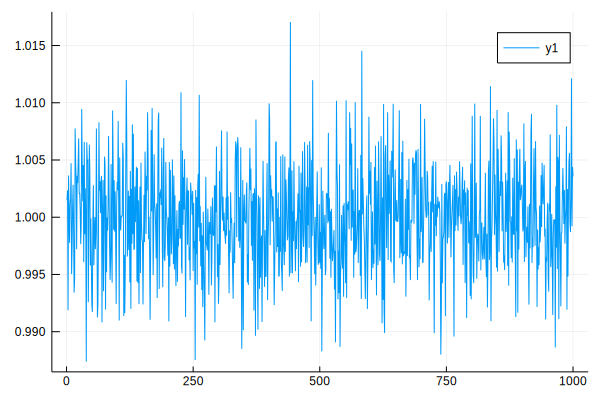

In [5]:
plot(diag(cov(A, corrected=false)))

In [10]:
Σ = cov(A)

1000×1000 Array{Float64,2}:
  1.00149      -0.00243837    0.00141582   …   0.00540405   -0.00972934 
 -0.00243837    1.00235      -0.000782381      0.00188302    0.00122376 
  0.00141582   -0.000782381   0.991875        -0.00424355   -0.00864262 
 -0.00107532    0.00134788   -0.00530319       0.00291916    0.00151091 
  0.00305429    0.00203026   -0.00771387      -0.0039684     0.00339329 
 -0.00730098    0.00241163    0.00135624   …  -0.00227569    0.00252712 
  0.00423527   -0.000333643   0.00401248      -0.000845379   0.00404651 
 -0.00053958   -0.00243841   -0.00027089      -0.00168227   -0.000475197
  0.000360898  -0.000778068   0.00549495      -0.00420535   -3.43269e-5 
  0.000490732  -0.00132754   -7.89487e-5       0.00320381   -0.00167666 
  0.000227657   0.000911842   0.00456697   …  -0.00132796    0.00120685 
  0.00177189    0.00136919   -0.00244984      -0.00222091    0.00328137 
 -0.0030746     0.000595077   0.00133318       0.00276164   -0.00389123 
  ⋮                    

In [11]:
identity = Matrix(I, p, p)
norm(identity - Σ)

3.1698496208389133

In [18]:
n_samle = 1e3
plt = plot(leg=false)

for i=1:25
    Σ = cov(randn((10000, i*100)))
    plot!(plt, eigvals(Σ), color="orange")
end

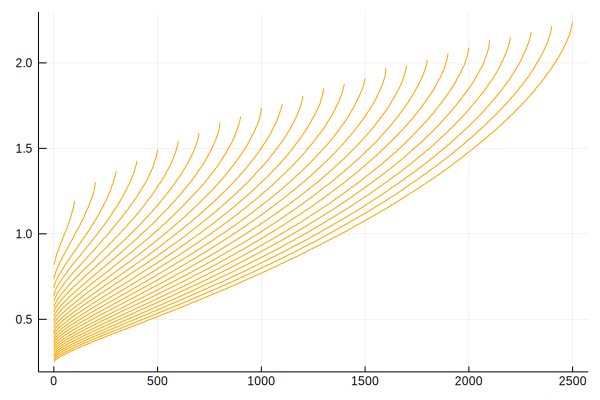

In [19]:
plt

In [57]:
n_samle = 1e3
Σ_eigs = zeros((6, 100))

for i=1:6
    Σ = cov(randn((10^i, 100)))
    Σ_eigs[i, :] = eigvals(Σ)
end

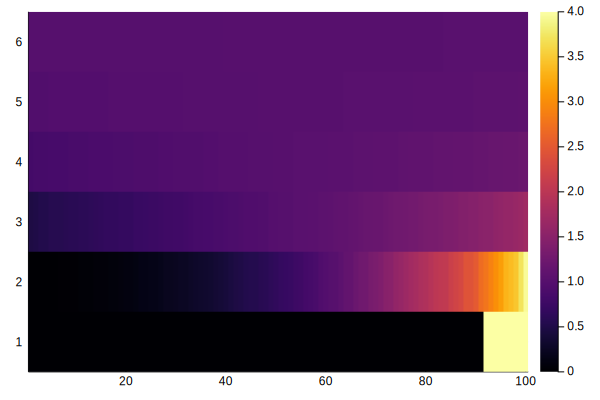

In [62]:
heatmap(clamp.(Σ_eigs, 0, 4))